In [1]:
# import MongoDB Client & necessary packages
from pymongo import MongoClient
import pprint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Requests sends and recieves HTTP requests.
import requests

# Beautiful Soup parses HTML documents in python.
from bs4 import BeautifulSoup

import json
import time


from scipy import stats

In [2]:
client = MongoClient('localhost', 27017)

In [4]:
# start mongoDB
db = client['book']
book_detail = db['book_detail']

In [6]:
# count of books
book_detail.estimated_document_count()

1902

### Simple Exploratory Data Analysis

In [7]:
df = pd.DataFrame(book_detail.find({},{'_id':False}))

In [9]:
df.head()

,book_title,author_name,avg_rating,rating_count,review_count,format,number_of_page,language,ISBN
0,Computer Science: An Overview,J. Glenn Brookshear,3.76,310,22,Paperback,599.0,English,ISBN0321387015(ISBN13:9780321387011)
1,Multiple Choice Questions in Computer Science,Ela Kumar,3.62,66,9,Paperback,472.0,None,ISBN819067577X(ISBN13:9788190675772)
2,Cambridge International as and a Level Compute...,Tony Piper,4.29,41,4,Paperback,328.0,None,ISBN1107547547(ISBN13:9781107547544)
3,"Algorithms on Strings, Trees and Sequences: Co...",Dan Gusfield,4.09,85,4,Hardcover,556.0,English,ISBN0521585198(ISBN13:9780521585194)
4,Coding the Matrix: Linear Algebra through Comp...,Philip N. Klein,4.23,115,5,Paperback,528.0,English,ISBN061585673X(ISBN13:9780615856735)


In [10]:
df.shape

(1902, 9)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1902 entries, 0 to 1901
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   book_title      1902 non-null   object 
 1   author_name     1902 non-null   object 
 2   avg_rating      1902 non-null   float64
 3   rating_count    1902 non-null   int64  
 4   review_count    1902 non-null   int64  
 5   format          1852 non-null   object 
 6   number_of_page  1573 non-null   float64
 7   language        956 non-null    object 
 8   ISBN            1902 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 148.6+ KB


In [12]:
df.describe()

,avg_rating,rating_count,review_count,number_of_page
count,1902.000000,1902.000000,1902.000000,1573.000000
mean,2.109311,10.786015,1.182440,387.778767
std,2.017028,61.096563,9.845778,305.735283
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,189.000000
50%,2.790000,1.000000,0.000000,332.000000
75%,4.000000,3.000000,0.000000,512.000000
max,5.000000,965.000000,218.000000,3348.000000


In [14]:
df.apply(lambda x: sum(x.isnull()),axis=0)

book_title          0
author_name         0
avg_rating          0
rating_count        0
review_count        0
format             50
number_of_page    329
language          946
ISBN                0
dtype: int64

### Plotting
We want to understand the dataset by plotting

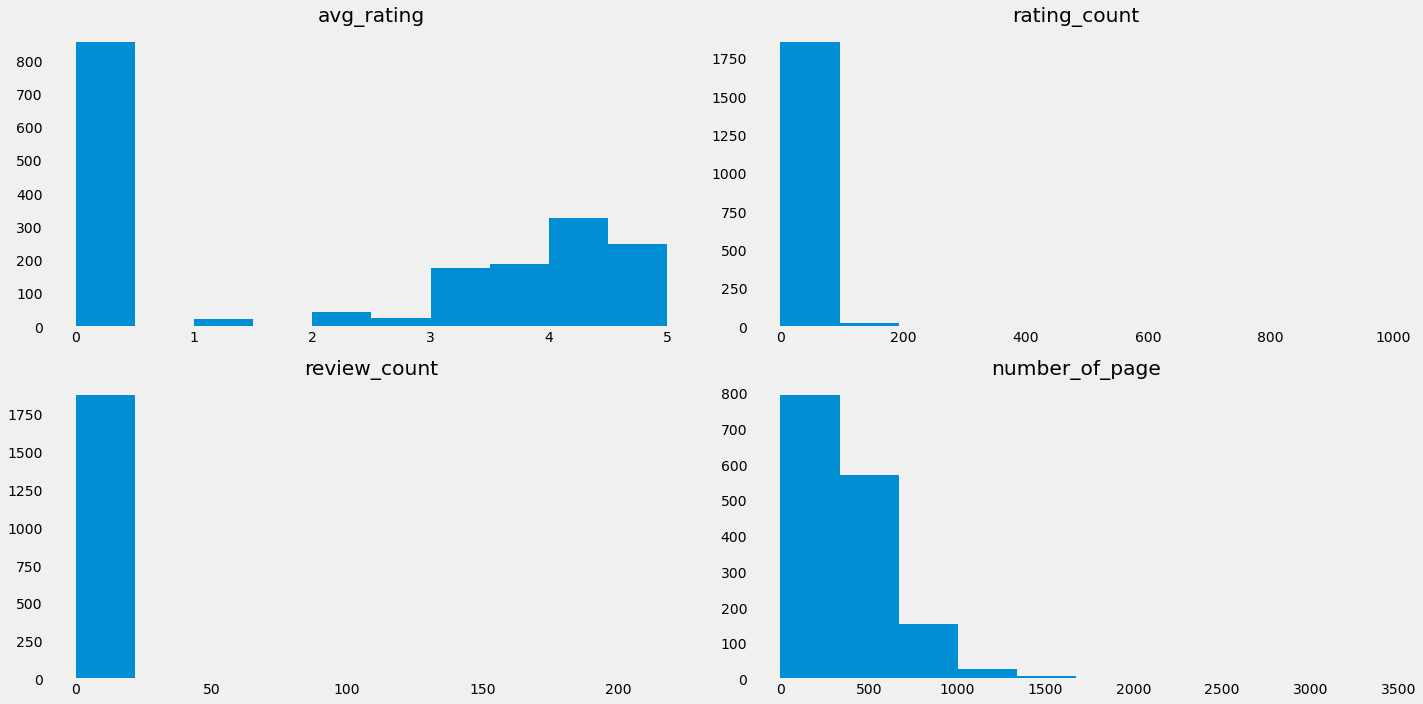

In [60]:
df.hist(figsize=(20,10), grid=False)
plt.tight_layout()

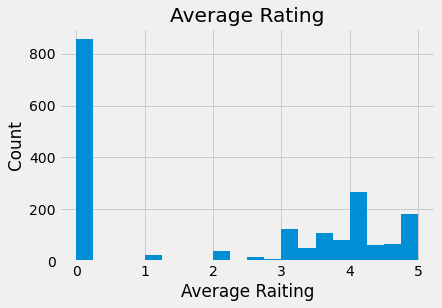

In [15]:
fig, ax = plt.subplots()
ax.hist(df['avg_rating'], bins=20);
plt.title("Average Rating")
plt.xlabel('Average Raiting')
plt.ylabel('Count');

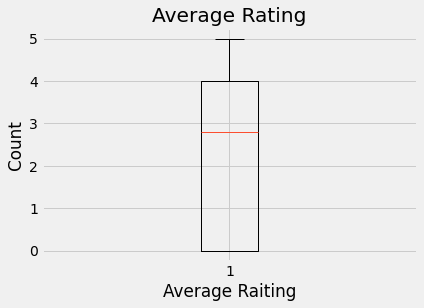

In [16]:
fig, ax = plt.subplots()
ax.boxplot(df['avg_rating']);
plt.title("Average Rating")
plt.xlabel('Average Raiting')
plt.ylabel('Count');

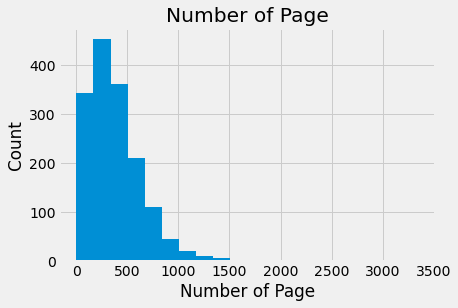

In [17]:
fig, ax = plt.subplots()
ax.hist(df['number_of_page'].dropna(), bins=20);
plt.title("Number of Page")
plt.xlabel('Number of Page')
plt.ylabel('Count');

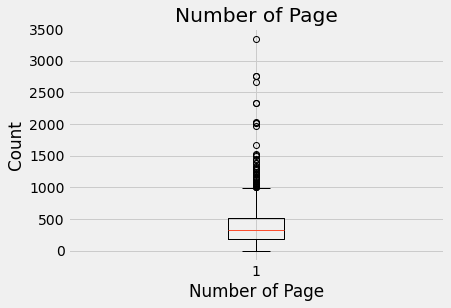

In [18]:
fig, ax = plt.subplots()
ax.boxplot(df['number_of_page'].dropna());
plt.title("Number of Page")
plt.xlabel('Number of Page')
plt.ylabel('Count');

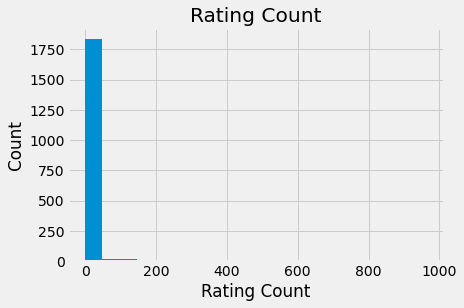

In [19]:
fig, ax = plt.subplots()
ax.hist(df['rating_count'], bins=20);
plt.title("Rating Count")
plt.xlabel('Rating Count')
plt.ylabel('Count');

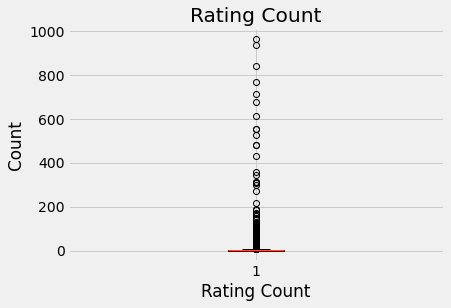

In [20]:
fig, ax = plt.subplots()
ax.boxplot(df['rating_count']);
plt.title("Rating Count")
plt.xlabel('Rating Count')
plt.ylabel('Count');

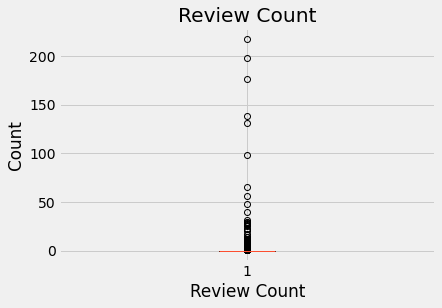

In [21]:
fig, ax = plt.subplots()
ax.boxplot(df['review_count']);
plt.title("Review Count")
plt.xlabel('Review Count')
plt.ylabel('Count');

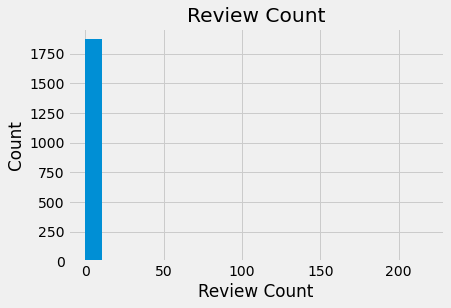

In [22]:
fig, ax = plt.subplots()
ax.hist(df['review_count'], bins=20);
plt.title("Review Count")
plt.xlabel('Review Count')
plt.ylabel('Count');

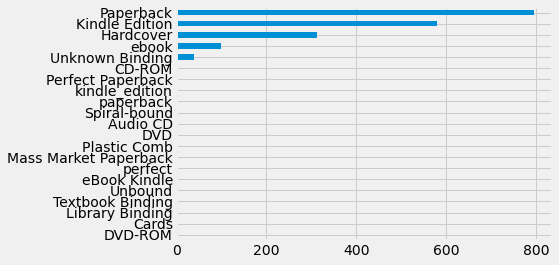

In [23]:
df['format'].value_counts().sort_values(ascending=True).plot(kind='barh');

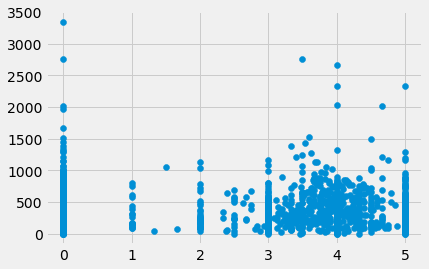

In [24]:
fig, ax = plt.subplots()
ax.scatter(df['avg_rating'],df['number_of_page']);

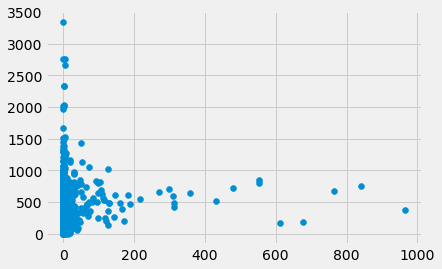

In [25]:
fig, ax = plt.subplots()
ax.scatter(df['rating_count'],df['number_of_page']);

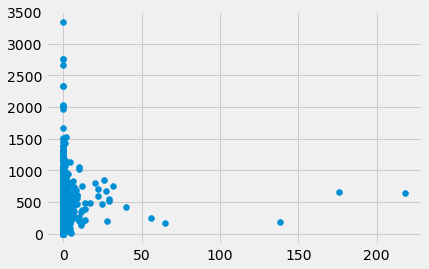

In [26]:
fig, ax = plt.subplots()
ax.scatter(df['review_count'],df['number_of_page']);

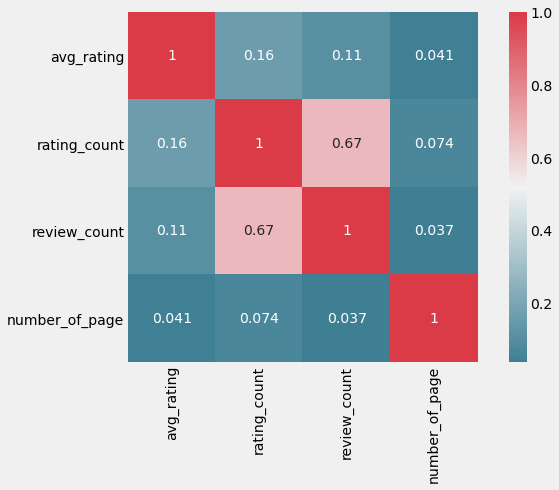

In [27]:
fig, ax = plt.subplots(figsize=(10,6))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), annot=True,cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax);

### Merge two datasets from two databases

We will also do some data cleaning process, such as converting ```first_publish_year``` and ```editions``` columns into pure integer datatype

In [28]:
db = client['book']
book_info = db['book_info']
df_link = pd.DataFrame(book_info.find({},{'_id':False}))

In [40]:
# Drop duplicates books
print(len(df_link))
df_link = df_link.drop_duplicates(subset=['book_title'])
print(len(df_link))

1916
1916


In [41]:
df_link.head()

,book_title,author_name,avg_rating,rating_count,publish year,edition,link
0,Computer Science: An Overview,J. Glenn Brookshear,3.76 avg rating,310 ratings,published 1985,35 editions,https://www.goodreads.com/book/show/533070.Com...
1,Multiple Choice Questions in Computer Science,Ela Kumar,3.62 avg rating,66 ratings,published 2008,1 edition,https://www.goodreads.com/book/show/8266079-mu...
2,Cambridge International as and a Level Compute...,Tony Piper,4.29 avg rating,41 ratings,None,1 edition,https://www.goodreads.com/book/show/28131102-c...
3,"Algorithms on Strings, Trees and Sequences: Co...",Dan Gusfield,4.09 avg rating,85 ratings,published 1997,4 editions,https://www.goodreads.com/book/show/145058.Alg...
4,Coding the Matrix: Linear Algebra through Comp...,Philip N. Klein,4.23 avg rating,115 ratings,published 2013,2 editions,https://www.goodreads.com/book/show/18245828-c...


In [42]:
total_df = pd.merge(df, df_link, on=['book_title'])

In [43]:
total_df.head()

,book_title,author_name_x,avg_rating_x,rating_count_x,review_count,format,number_of_page,language,ISBN,author_name_y,avg_rating_y,rating_count_y,publish year,edition,link
0,Computer Science: An Overview,J. Glenn Brookshear,3.76,310,22,Paperback,599.0,English,ISBN0321387015(ISBN13:9780321387011),J. Glenn Brookshear,3.76 avg rating,310 ratings,published 1985,35 editions,https://www.goodreads.com/book/show/533070.Com...
1,Multiple Choice Questions in Computer Science,Ela Kumar,3.62,66,9,Paperback,472.0,None,ISBN819067577X(ISBN13:9788190675772),Ela Kumar,3.62 avg rating,66 ratings,published 2008,1 edition,https://www.goodreads.com/book/show/8266079-mu...
2,Cambridge International as and a Level Compute...,Tony Piper,4.29,41,4,Paperback,328.0,None,ISBN1107547547(ISBN13:9781107547544),Tony Piper,4.29 avg rating,41 ratings,None,1 edition,https://www.goodreads.com/book/show/28131102-c...
3,"Algorithms on Strings, Trees and Sequences: Co...",Dan Gusfield,4.09,85,4,Hardcover,556.0,English,ISBN0521585198(ISBN13:9780521585194),Dan Gusfield,4.09 avg rating,85 ratings,published 1997,4 editions,https://www.goodreads.com/book/show/145058.Alg...
4,Coding the Matrix: Linear Algebra through Comp...,Philip N. Klein,4.23,115,5,Paperback,528.0,English,ISBN061585673X(ISBN13:9780615856735),Philip N. Klein,4.23 avg rating,115 ratings,published 2013,2 editions,https://www.goodreads.com/book/show/18245828-c...


In [44]:
# drop columns 
total_df = total_df.drop(columns=['author_name_y','avg_rating_y','rating_count_y'])

In [45]:
publish_year = []
for x in total_df['publish year']:
    if x == None:
        publish_year.append(None)
    else:
        publish_year.append(int((x.replace('published ', ''))))

In [47]:
publish_year[:5]

[1985, 2008, None, 1997, 2013]

In [48]:
def replace_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text

editions = []
d = { " editions": "", " edition": ""}
for x in total_df['edition']:
    if x == None:
        editions.append(None)
    else:
        editions.append(int(replace_all(x,d)))

In [49]:
total_df['first_publish_year'] = publish_year
total_df['editions'] = editions

In [50]:
total_df['first_publish_year'] = total_df.first_publish_year.astype('Int64')

In [51]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1614 entries, 0 to 1613
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   book_title          1614 non-null   object 
 1   author_name_x       1614 non-null   object 
 2   avg_rating_x        1614 non-null   float64
 3   rating_count_x      1614 non-null   int64  
 4   review_count        1614 non-null   int64  
 5   format              1568 non-null   object 
 6   number_of_page      1313 non-null   float64
 7   language            815 non-null    object 
 8   ISBN                1614 non-null   object 
 9   publish year        887 non-null    object 
 10  edition             1614 non-null   object 
 11  link                1614 non-null   object 
 12  first_publish_year  887 non-null    Int64  
 13  editions            1614 non-null   int64  
dtypes: Int64(1), float64(2), int64(3), object(8)
memory usage: 190.7+ KB


In [52]:
total_df = total_df.drop(columns=['edition','publish year'])

In [53]:
total_df = total_df.rename(columns={'author_name_x': 'author',
                              'avg_rating_x': 'average_rating',
                              'rating_count_x':'rating_count'})

In [54]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1614 entries, 0 to 1613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   book_title          1614 non-null   object 
 1   author              1614 non-null   object 
 2   average_rating      1614 non-null   float64
 3   rating_count        1614 non-null   int64  
 4   review_count        1614 non-null   int64  
 5   format              1568 non-null   object 
 6   number_of_page      1313 non-null   float64
 7   language            815 non-null    object 
 8   ISBN                1614 non-null   object 
 9   link                1614 non-null   object 
 10  first_publish_year  887 non-null    Int64  
 11  editions            1614 non-null   int64  
dtypes: Int64(1), float64(2), int64(3), object(6)
memory usage: 165.5+ KB


In [55]:
total_df['number_of_page'] = total_df.number_of_page.astype('Int64')
column_names = ['book_title','author','average_rating','rating_count','review_count', 'number_of_page',
                'first_publish_year','editions','format', 'language','ISBN','link']
total_df = total_df.reindex(columns=column_names)
total_df.head()

,book_title,author,average_rating,rating_count,review_count,number_of_page,first_publish_year,editions,format,language,ISBN,link
0,Computer Science: An Overview,J. Glenn Brookshear,3.76,310,22,599,1985,35,Paperback,English,ISBN0321387015(ISBN13:9780321387011),https://www.goodreads.com/book/show/533070.Com...
1,Multiple Choice Questions in Computer Science,Ela Kumar,3.62,66,9,472,2008,1,Paperback,None,ISBN819067577X(ISBN13:9788190675772),https://www.goodreads.com/book/show/8266079-mu...
2,Cambridge International as and a Level Compute...,Tony Piper,4.29,41,4,328,<NA>,1,Paperback,None,ISBN1107547547(ISBN13:9781107547544),https://www.goodreads.com/book/show/28131102-c...
3,"Algorithms on Strings, Trees and Sequences: Co...",Dan Gusfield,4.09,85,4,556,1997,4,Hardcover,English,ISBN0521585198(ISBN13:9780521585194),https://www.goodreads.com/book/show/145058.Alg...
4,Coding the Matrix: Linear Algebra through Comp...,Philip N. Klein,4.23,115,5,528,2013,2,Paperback,English,ISBN061585673X(ISBN13:9780615856735),https://www.goodreads.com/book/show/18245828-c...


In [57]:
# after the data cleaning process, we have 1614 books
total_df.shape

(1614, 12)

In [ ]:
# to CSV file
total_df.to_csv('total_df.csv', index = False)

In [58]:
total_df.describe()

,average_rating,rating_count,review_count,number_of_page,first_publish_year,editions
count,1614.000000,1614.000000,1614.000000,1313.000000,887.000000,1614.000000
mean,2.050638,10.614002,1.005576,406.085301,2000.298760,1.919455
std,2.027315,62.473933,7.969523,317.293536,13.650996,2.746528
min,0.000000,0.000000,0.000000,0.000000,1753.000000,1.000000
25%,0.000000,0.000000,0.000000,198.000000,1994.000000,1.000000
50%,2.165000,1.000000,0.000000,351.000000,2002.000000,1.000000
75%,4.000000,2.000000,0.000000,528.000000,2009.000000,2.000000
max,5.000000,965.000000,198.000000,3348.000000,2017.000000,50.000000


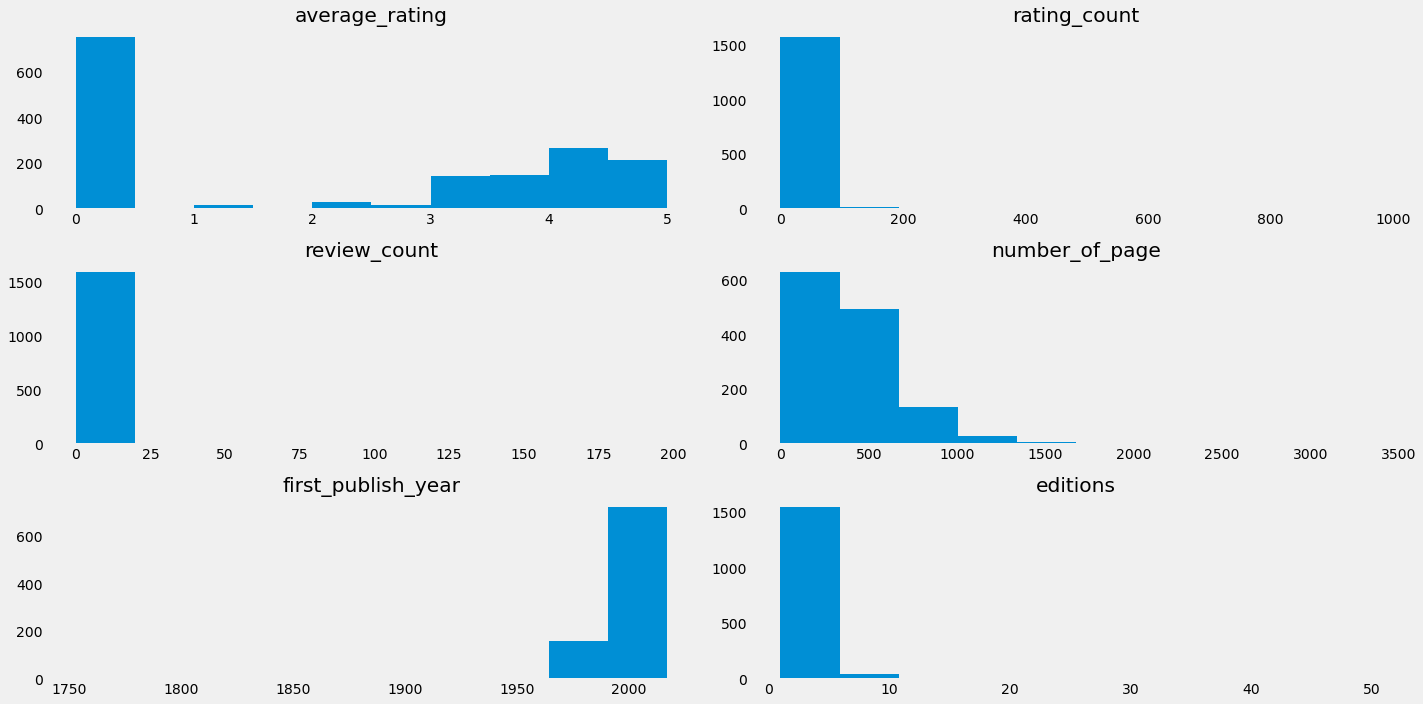

In [59]:
total_df.hist(figsize=(20,10), grid=False)
plt.tight_layout()

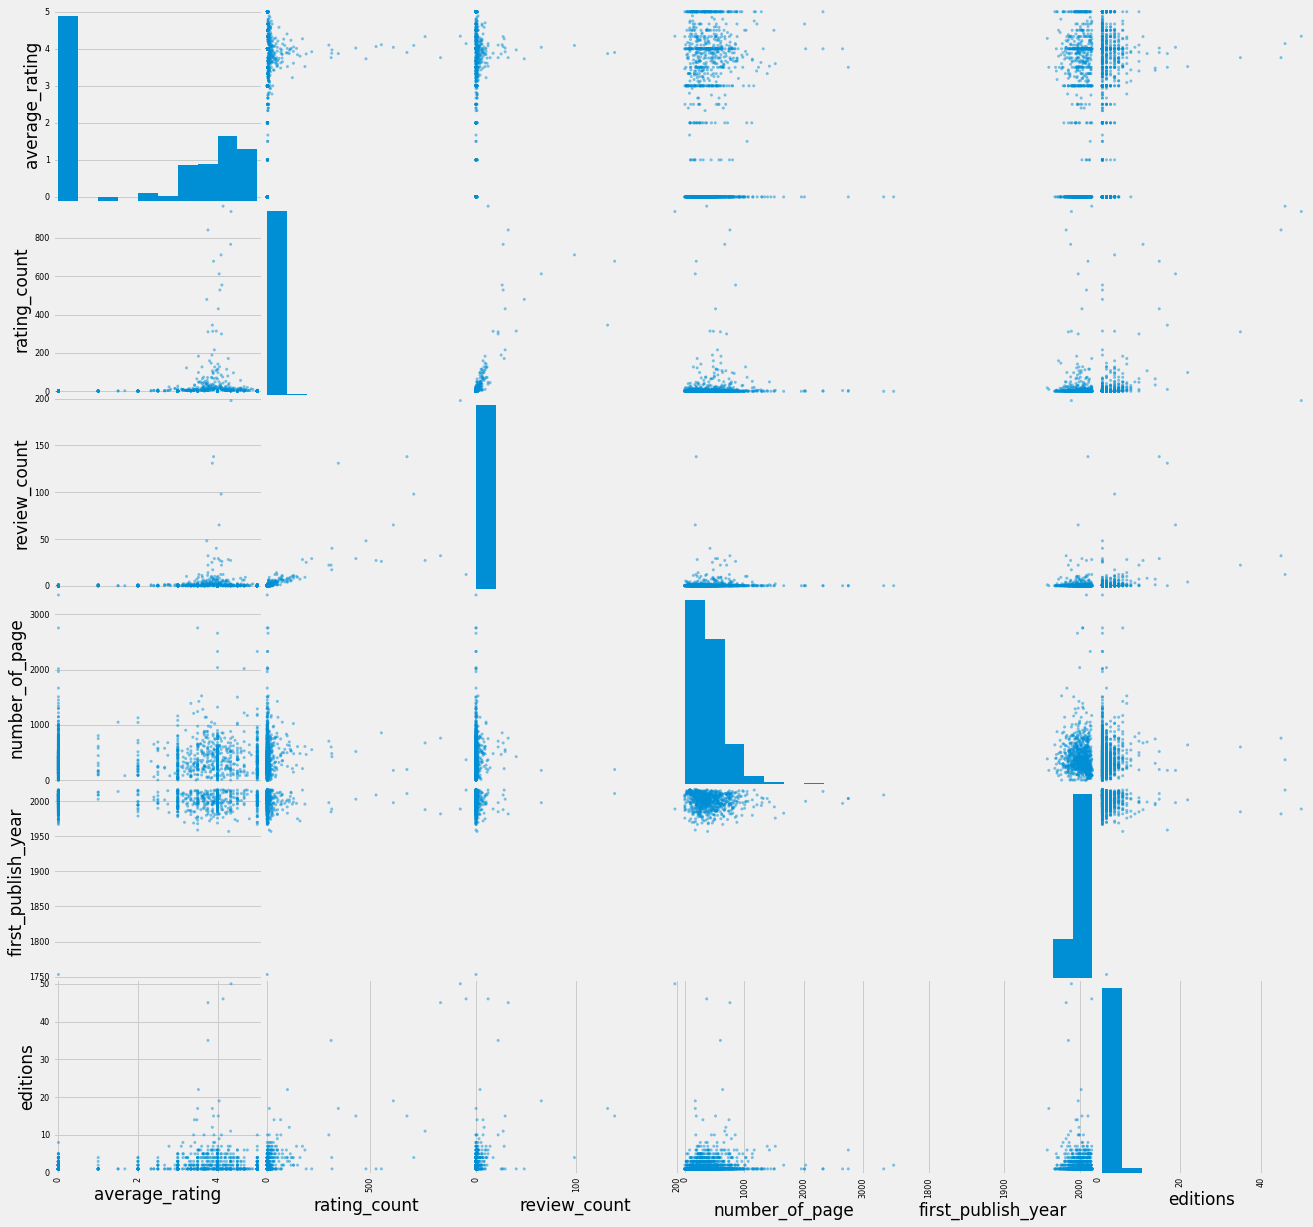

In [63]:
pd.plotting.scatter_matrix(total_df,figsize=(20,20));

### Data is not normalize, we want to do a log transformation and see if that helps

[   1.            1.33352143    1.77827941    2.37137371    3.16227766
    4.21696503    5.62341325    7.49894209   10.           13.33521432
   17.7827941    23.71373706   31.6227766    42.16965034   56.23413252
   74.98942093  100.          133.35214322  177.827941    237.13737057
  316.22776602  421.69650343  562.34132519  749.89420933 1000.        ]


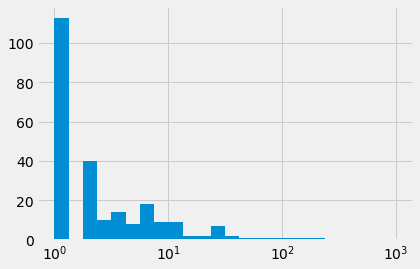

In [64]:
bins = np.logspace(0,3,25)
fix, ax = plt.subplots()
ax.hist(total_df['review_count'], bins=bins)
ax.set_xscale('log')
print(bins)

### Statistical Tests

We will split the population using the mean of number of pages

In [68]:
np.mean(total_df['number_of_page'])

406.08530083777606

In [69]:
greater = total_df[total_df['number_of_page'] >= np.mean(total_df['number_of_page'])]
less = total_df[total_df['number_of_page'] < np.mean(total_df['number_of_page'])]

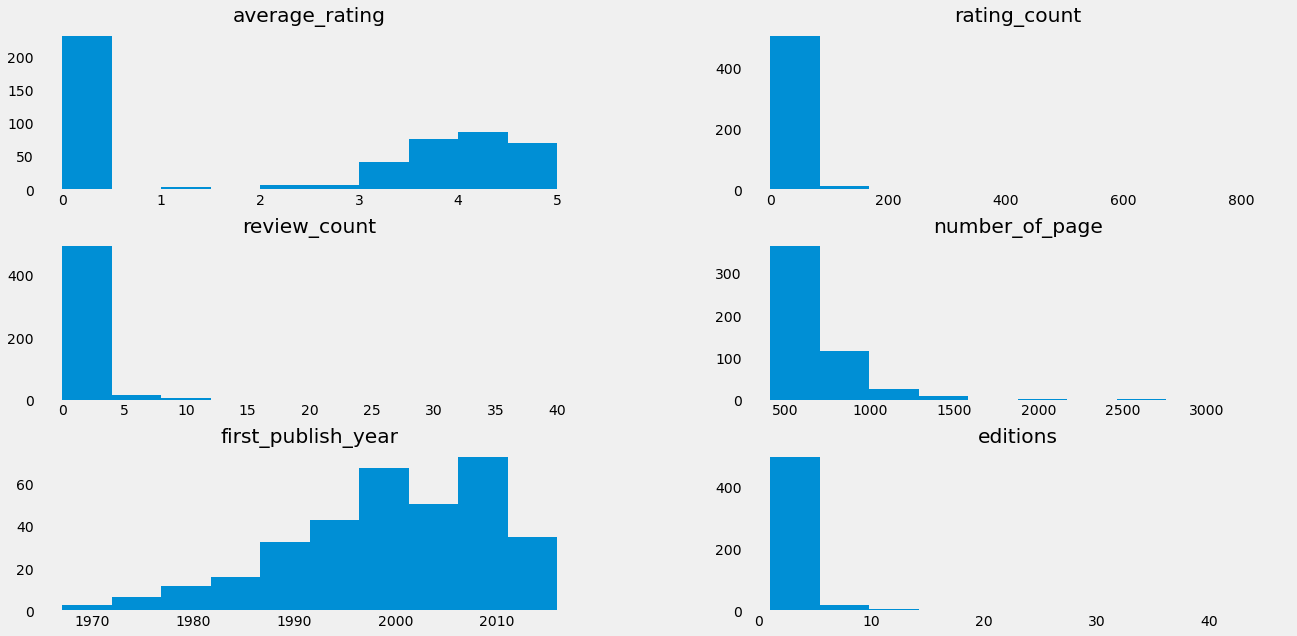

In [66]:
greater.hist(figsize=(20,10), grid=False);

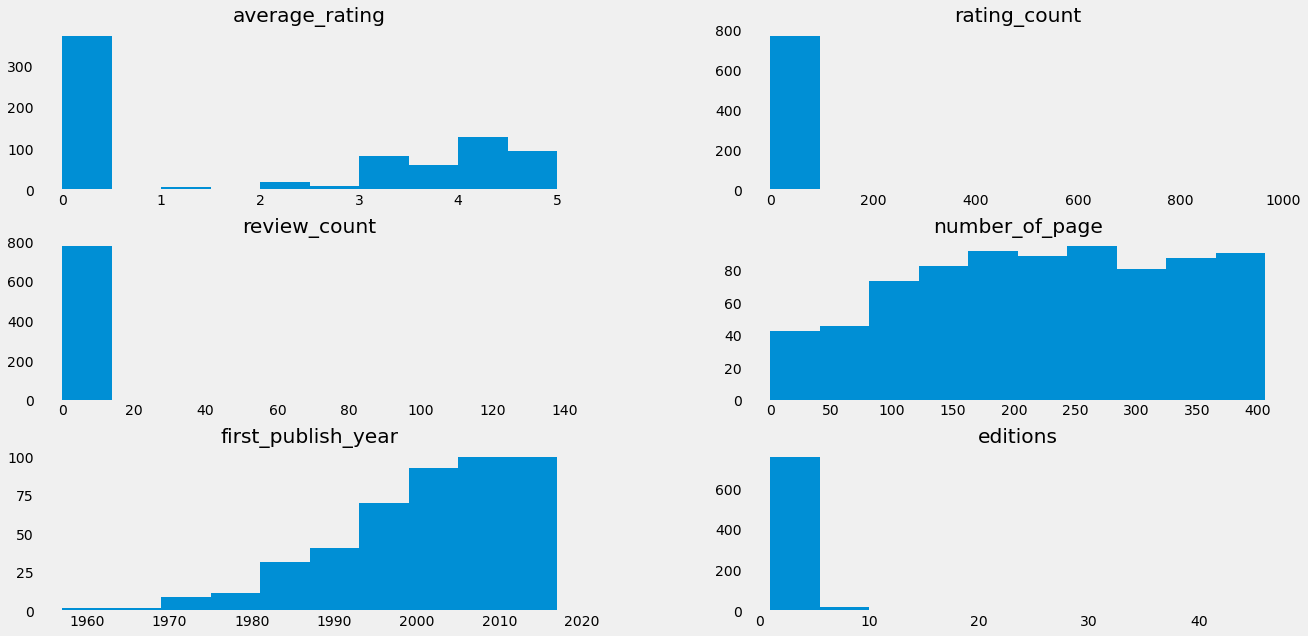

In [70]:
less.hist(figsize=(20,10), grid=False);

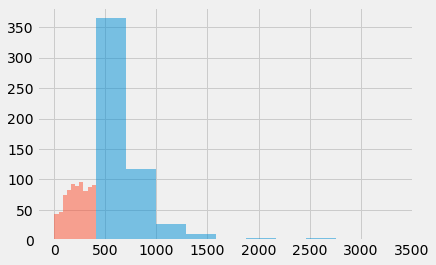

In [74]:
fig, ax = plt.subplots()
ax.hist(greater['number_of_page'],alpha=0.5);
ax.hist(less['number_of_page'], alpha=0.5);

In [96]:
print('Average Rating of Books with Long Pages')
print('---------------------------------------')
print('total row after split: ' + str(len(greater)))
greater_avg_rating = greater.loc[~(greater['average_rating'] == 0)]
print('total row after clean average rating: ' + str(len(greater_avg_rating)))
print('mean: ' + str(np.mean(greater_avg_rating['average_rating'])))

Average Rating of Books with Long Pages
---------------------------------------
total row after split: 531
total row after clean average rating: 299
mean: 3.8987290969899657


In [98]:
print('Average Rating of Books with Short Pages')
print('---------------------------------------')
print('total row after split: ' + str(len(less)))
less_avg_rating = less.loc[~(less['average_rating'] == 0)]
print('total row after clean average rating ' + str(len(less_avg_rating)))
print('mean: ' + str(np.mean(less_avg_rating['average_rating'])))

Average Rating of Books with Short Pages
---------------------------------------
total row after split: 782
total row after clean average rating 407
mean: 3.821130221130222


In [118]:
print('Average Rating - Statistical Tests between Long & Short Pages Books')
print('-------------------------------------------------------------------')
stat, p_val = stats.ttest_ind(greater_avg_rating['average_rating'],less_avg_rating['average_rating'], equal_var=False)
print('average rating t-test: ' + str(stat) + '\np-value: ' + str(p_val))

Average Rating - Statistical Tests between Long & Short Pages Books
-------------------------------------------------------------------
average rating t-test: 1.219715111325505
p-value: 0.22300122216112636


In [108]:
print('Rating Count of Books with Long Pages')
print('---------------------------------------')
print('total row after split: ' + str(len(greater)))
greater_rating_count = greater.loc[~(greater['rating_count'] == 0)]
print('total row after clean rating count ' + str(len(greater_rating_count)))
print(np.mean(greater_rating_count['rating_count']))

Rating Count of Books with Long Pages
---------------------------------------
total row after split: 531
total row after clean rating count 299
27.535117056856187


In [110]:
print('Rating Count of Books with Short Pages')
print('---------------------------------------')
print('total row after split: ' + str(len(less)))
less_rating_count = less.loc[~(less['rating_count'] == 0)]
print('total row after clean rating count ' + str(len(less_rating_count)))
print(np.mean(less_rating_count['rating_count']))

Rating Count of Books with Short Pages
---------------------------------------
total row after split: 782
total row after clean rating count 407
12.658476658476658


In [117]:
print('Rating Count - Statistical Tests between Long & Short Pages Books')
print('-------------------------------------------------------------------')
stat, p_val = stats.ttest_ind(greater_rating_count['rating_count'],less_rating_count['rating_count'], equal_var=False)
print('rating_count t-test: ' + str(stat) + '\np-value: ' + str(p_val))
print('\n--------------------------Finding-------------------------')
print('books with more pages tend to be rated more often')

Rating Count - Statistical Tests between Long & Short Pages Books
-------------------------------------------------------------------
rating_count t-test: 2.4409249337417505
p-value: 0.014972240815203488

--------------------------Finding-------------------------
books with more pages tend to be rated more often


In [119]:
print('Review Count of Books with Long Pages')
print('---------------------------------------')
print('total row after split: ' + str(len(greater)))
greater_review_count = greater.loc[~(greater['review_count'] == 0)]
print('total row after clean review count ' + str(len(greater_review_count)))
print(np.mean(greater_review_count['review_count']))

Review Count of Books with Long Pages
---------------------------------------
total row after split: 531
total row after clean review count 93
5.806451612903226


In [121]:
print('Review Count of Books with Short Pages')
print('---------------------------------------')
print('total row after split: ' + str(len(less)))
less_review_count = less.loc[~(less['review_count'] == 0)]
print('total row after clean review count ' + str(len(less_review_count)))
print(np.mean(less_review_count['review_count']))

Review Count of Books with Short Pages
---------------------------------------
total row after split: 782
total row after clean review count 107
4.579439252336448


In [123]:
print('Review Count - Statistical Tests between Long & Short Pages Books')
print('-------------------------------------------------------------------')
stat, p_val = stats.ttest_ind(greater_review_count['review_count'],less_review_count['review_count'], equal_var=False)
print('review_count t-test: ' + str(stat) + '\np-value: ' + str(p_val))

Review Count - Statistical Tests between Long & Short Pages Books
-------------------------------------------------------------------
review_count t-test: 0.7394040422987039
p-value: 0.46069178770686625


In [127]:
print('Number of Editions of Books with Long Pages')
print('---------------------------------------')
print('total row after split: ' + str(len(greater)))
greater_editions = greater.loc[~(greater['editions'] == 0)]
print('total row after clean editions ' + str(len(greater_editions)))
print(np.mean(greater_editions['editions']))

Number of Editions of Books with Long Pages
---------------------------------------
total row after split: 531
total row after clean editions 531
2.169491525423729


In [126]:
print('Number of Editions of Books with Short Pages')
print('---------------------------------------')
print('total row after split: ' + str(len(less)))
less_editions = less.loc[~(less['editions'] == 0)]
print('total row after clean editions ' + str(len(less_editions)))
print(np.mean(less_editions['editions']))

Number of Editions of Books with Short Pages
---------------------------------------
total row after split: 782
total row after clean editions 782
1.9335038363171355


In [130]:
print('Number of Editions - Statistical Tests between Long & Short Pages Books')
print('-----------------------------------------------------------------------')
stat, p_val = stats.ttest_ind(greater_editions['review_count'],less_editions['review_count'], equal_var=False)
print('editions: ' + str(stat) + '\np-value: ' + str(p_val))

Number of Editions - Statistical Tests between Long & Short Pages Books
-----------------------------------------------------------------------
editions: 1.456642322656463
p-value: 0.14545503328603518
